## 충청북도, 143874
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'ccb_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143874 entries, 0 to 143873
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 115.3+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gsn_pop', 'gj_pop', 'dg_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143874 entries, 0 to 143873
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               143874 non-null  object 
 1   apt_floor                143874 non-null  int64  
 2   period_completed         143874 non-null  int64  
 3   pyung                    143874 non-null  float64
 4   price_per_pyung_present  143874 non-null  float64
 5   kospi200                 143874 non-null  float64
 6   kospi200construct        143874 non-null  float64
 7   kosdaq                   143874 non-null  float64
 8   dowjones                 143874 non-null  float64
 9   shanghai                 143874 non-null  float64
 10  exchange_rate            143874 non-null  float64
 11  gold                     143874 non-null  float64
 12  oil                      143874 non-null  float64
 13  export                   143874 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

청주흥덕구    29021
청주서원구    23604
청주청원구    20037
충주시      19667
청주상당구    15632
제천시      11701
음성군       8321
진천군       6064
증평군       3260
영동군       1883
옥천군       1811
보은군       1441
단양군       1122
괴산군        310
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'dj_pop', 'ccn_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143874 entries, 0 to 143873
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               143874 non-null  object 
 1   apt_floor                143874 non-null  int64  
 2   period_completed         143874 non-null  int64  
 3   pyung                    143874 non-null  float64
 4   price_per_pyung_present  143874 non-null  float64
 5   kospi200                 143874 non-null  float64
 6   kospi200construct        143874 non-null  float64
 7   kosdaq                   143874 non-null  float64
 8   dowjones                 143874 non-null  float64
 9   shanghai                 143874 non-null  float64
 10  exchange_rate            143874 non-null  float64
 11  gold                     143874 non-null  float64
 12  oil                      143874 non-null  float64
 13  export                   143874 non-null  int64  
 14  impo

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
apt_floor                  0.427040
pyung                      0.409392
gold                       0.056774
exchange_rate              0.047919
gg_pop                     0.045022
cpi_living                 0.035134
ccb_loan                   0.031934
dowjones                   0.031751
ccb_re_ccsi                0.029179
ccb_pop                    0.028607
shanghai                   0.010593
kosdaq                    -0.013581
import                    -0.024214
kospi200                  -0.024780
gw_pop                    -0.033640
kospi200construct         -0.046862
oil                       -0.048545
export                    -0.055782
loan_interest_rate        -0.058811
gsb_pop                   -0.064013
period_completed          -0.673681
Name: price_per_pyung_present, dtype: float64

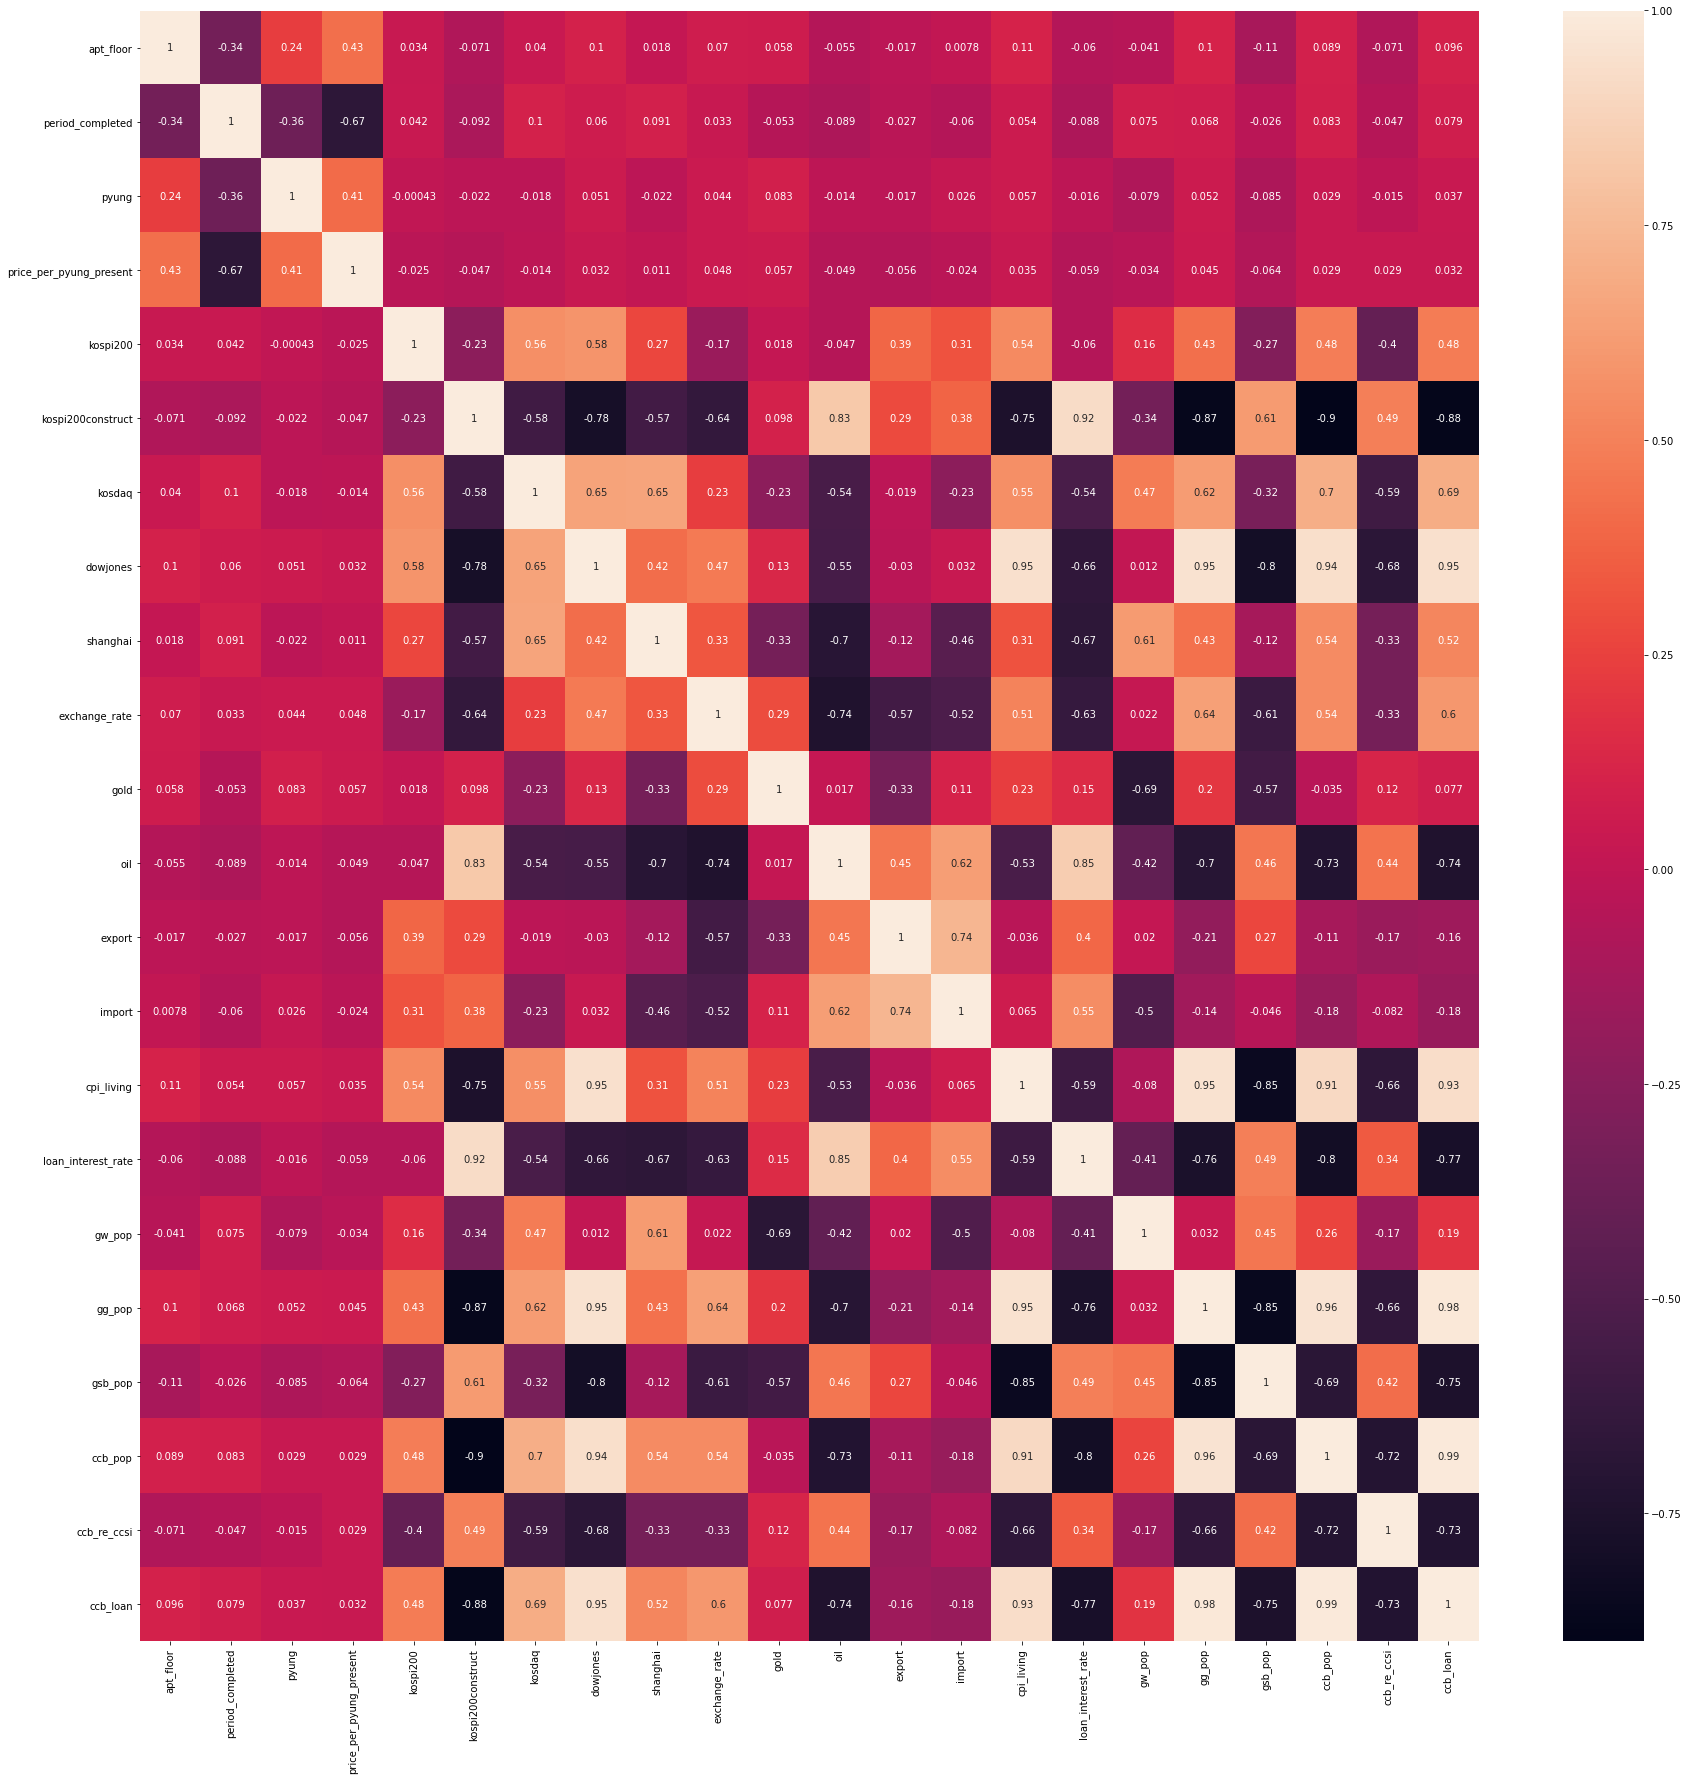

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.438740e+05
mean     7.025066e+06
std      2.822398e+06
min      3.301650e+05
25%      4.799829e+06
50%      6.758064e+06
75%      8.970824e+06
max      2.470676e+07
Name: price_per_pyung_present, dtype: float64


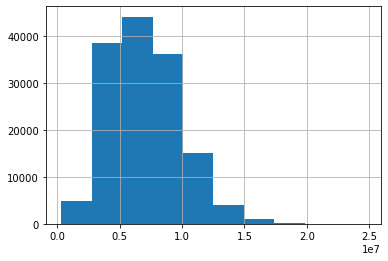

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 3.301650e+05  # min
print(preD['price_cat'].describe())

count    143874.000000
mean         21.277441
std           8.548446
min           1.000000
25%          14.537668
50%          20.468747
75%          27.170730
max          74.831563
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 14.537668 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 20.468747 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 27.170730 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

3.0    35978
1.0    35969
2.0    35966
4.0    35961
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'ccb_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143874 entries, 0 to 143873
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               143874 non-null  object 
 1   apt_floor                143874 non-null  int64  
 2   period_completed         143874 non-null  int64  
 3   pyung                    143874 non-null  float64
 4   price_per_pyung_present  143874 non-null  float64
 5   kospi200                 143874 non-null  float64
 6   kospi200construct        143874 non-null  float64
 7   kosdaq                   143874 non-null  float64
 8   dowjones                 143874 non-null  float64
 9   shanghai                 143874 non-null  float64
 10  exchange_rate            143874 non-null  float64
 11  gold                     143874 non-null  float64
 12  oil                      143874 non-null  float64
 13  export                   143874 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

3.0    0.250062
1.0    0.250002
2.0    0.249983
4.0    0.249953
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

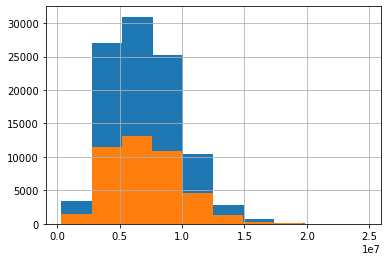

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([ 1.41955057, -1.02856581,  0.64861491, -0.30876382,  1.25756596,
       -1.06416825, -1.06245123, -1.15508556, -0.9304939 , -0.16093833,
        1.56460824, -0.14838202,  0.16736516, -0.85900953,  1.17030929,
       -0.46615362, -1.10190586,  0.6040522 , -1.17023038,  1.01200149,
       -1.2669948 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [800],
              'gbr__max_depth': [7]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.9372579726071194
테스트 세트 점수:  0.9428337474795455
최적의 매개변수: {'gbr__max_depth': 7, 'gbr__n_estimators': 800}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  675514.3712756529
grid mae:  465231.9591432015


In [13]:
grid.cv_results_

{'mean_fit_time': array([269.40052899]),
 'std_fit_time': array([1.87397212]),
 'mean_score_time': array([0.72938569]),
 'std_score_time': array([0.00233148]),
 'param_gbr__max_depth': masked_array(data=[7],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[800],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 7, 'gbr__n_estimators': 800}],
 'split0_test_score': array([0.93670668]),
 'split1_test_score': array([0.93722347]),
 'split2_test_score': array([0.93784377]),
 'mean_test_score': array([0.93725797]),
 'std_test_score': array([0.00046486]),
 'rank_test_score': array([1])}

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/ccb_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  675514.3712756529
